In [12]:
reviews = []; ratings = []
with open("PlayStation-4-Console reviews.txt") as f:
    for line in f:
        line = line.strip()
        if line[:7] == "rating:":
            ratings.append(int(float(line.split()[1])))
        if line[:7] == "review:":
            reviews.append(line[8:])
assert len(ratings) == len(reviews)


##Find all sentences
from nltk import sent_tokenize
sentences = []
for review in reviews:
    sentences += sent_tokenize(review)
print(len(sentences))    

38096


In [13]:
print(sentences[0])

I purchased the launch version at 12:15 Friday night of the 15th.


In [14]:
##Find all words
from nltk.tokenize import word_tokenize
tokens = []
for sentence in sentences:
    tokens += word_tokenize(sentence)
print(len(tokens))

767470


In [15]:
##Filter out punctuation
tokens_no_punc = [token for token in tokens if token.isalpha()]
print(len(tokens_no_punc))

649615


In [16]:
##Convert all tokens into lower case
lower = [token.lower() for token in tokens_no_punc]

In [17]:
##Remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in lower if word not in stop_words]
print(len(words),words[:20])

317841 ['purchased', 'launch', 'version', 'friday', 'night', 'glad', 'got', 'next', 'morning', 'looked', 'online', 'already', 'sold', 'prime', 'shipping', 'arrived', 'monday', 'afternoon', 'worried', 'going']


In [19]:
#Dictionary for word_counts
word_counts = {}
for word in words:
    if word_counts.get(word) is None:
        word_counts[word] = 1
    else:
        word_counts[word] += 1
print(word_counts['version'])        

154


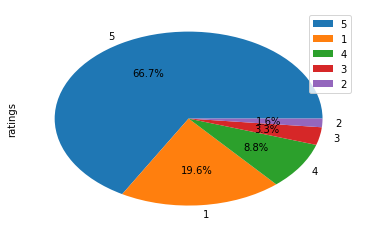

In [30]:
import pandas as pd
%matplotlib inline
ratings = pd.Series(ratings,name='ratings')
ratings.value_counts().plot.pie(legend=True,autopct='%.1f%%')

In [31]:
##sort the word_counts dictionary
import operator
sorted_word_counts = sorted(word_counts.items(),key=operator.itemgetter(1),reverse=True)
sorted_word_counts

[('games', 4104),
 ('system', 3659),
 ('console', 3506),
 ('one', 3195),
 ('sony', 3180),
 ('great', 2656),
 ('like', 2498),
 ('get', 2456),
 ('game', 2259),
 ('controller', 2224),
 ('amazon', 2150),
 ('new', 1917),
 ('xbox', 1855),
 ('play', 1837),
 ('would', 1716),
 ('launch', 1603),
 ('time', 1533),
 ('really', 1498),
 ('got', 1482),
 ('playstation', 1402),
 ('much', 1374),
 ('better', 1322),
 ('box', 1311),
 ('good', 1245),
 ('issues', 1231),
 ('also', 1225),
 ('day', 1198),
 ('far', 1193),
 ('even', 1183),
 ('well', 1125),
 ('back', 1110),
 ('light', 1092),
 ('graphics', 1073),
 ('first', 1072),
 ('works', 1066),
 ('playing', 1061),
 ('love', 1050),
 ('blue', 993),
 ('update', 965),
 ('people', 965),
 ('problems', 937),
 ('gaming', 931),
 ('could', 917),
 ('right', 904),
 ('amazing', 900),
 ('everything', 895),
 ('still', 892),
 ('use', 883),
 ('next', 863),
 ('wait', 850),
 ('best', 822),
 ('buy', 813),
 ('see', 802),
 ('fast', 801),
 ('since', 786),
 ('work', 760),
 ('going', 75

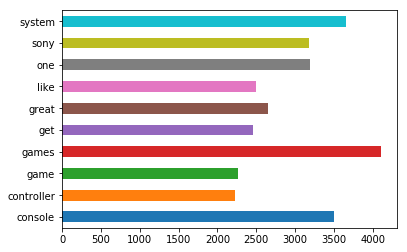

In [38]:
##make a dictionary for plotting
sorted_dict = dict(sorted_word_counts[:10])
sorted_dict
s = pd.Series(sorted_dict)
s.plot.barh()